# Movie Recommendation System (Main Project)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Recommendation system adalah sebuah sistem yang mengacu pada memprediksi sejumlah item atau data untuk pengguna di masa mendatang, kemudian dijadikan rekomendasi item paling teratas. Salah satu alasan mengapa perlu digunakannya recommendation system karena pengguna memiliki banyak pilihan untuk digunakan karena prevalensi internet.


Meskipun jumlah informasi yang tersedia meningkat, masalah baru muncul karena para pengguna kesulitan memilih item yang ingin mereka lihat. kelebihan pilihan dapat membuat pengguna bingung atau kehilangan arah. Rekomendasi sistem membantu menyaring pilihan-pilihan tersebut dan memberikan rekomendasi yang relevan berdasarkan preferensi pengguna, sehingga membantu pengguna dalam pengambilan keputusan.


**Objectives**
- 1. Bagaimana cara menghitung kemiripan sebuah film?
- 2. Bagaimana cara menerapkannya pada sistem rekomendasi?

Dataset : https://www.kaggle.com/datasets/meastanmay/imdb-dataset?select=movies.csv

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn import preprocessing
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
# from sklearn.metrics import classification_report

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# adjust the path accordingly
# df_1 = pd.read_csv('/content/drive/MyDrive/tugas dibimbing/Final Project/movie/archive (51)/tmdb_5000_movies.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/tugas dibimbing/Final Project/movie/archive (51)/ratings.csv')
df_3= pd.read_csv('/content/drive/MyDrive/tugas dibimbing/Final Project/movie/archive (51)/movies.csv')
# df_tmdb=df_1.copy()
df_user=df_2.copy()
df_movies=df_3.copy()

In [ ]:
# df_tmdb.head()

In [ ]:
df_user.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Dictionary :

Dataset -> df_user

* userid – Unique user number.
* movieId – Unique movie number.
* rating – The rating given to the movie by the user
* timestamp – Evaluation date

Dataset -> df_movies
* movieId – Unique movie number. (UniqueID)
* title – Movie name
* genres – list of genres

# Standard Data Cleansing

### general dataframe information

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


### Pre-Processing

In [ ]:
df_user_ratings = df_movies.merge(df_user, how="left", on="movieId")

In [ ]:
df_user_ratings.reset_index(drop=True, inplace=True)

In [ ]:
df_user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105343 entries, 0 to 105342
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105343 non-null  int64  
 1   title      105343 non-null  object 
 2   genres     105343 non-null  object 
 3   userId     105339 non-null  float64
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ MB


Observation
1. Data berisi 105343 baris dengan 6 kolom

In [ ]:
# # Konversi timestamp ke dalam format menit
# df_user_ratings['timestamp_minute'] = pd.to_datetime(df_user_ratings['timestamp'], unit='s').dt.minute

In [ ]:
df_user_ratings['timestamp_seconds'] = pd.to_datetime(df_user_ratings['timestamp'], unit='s')

In [ ]:
df_user_ratings

,movieId,title,genres,userId,rating,timestamp,timestamp_seconds
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08,1997-03-22 16:08:15
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09,2011-04-22 19:37:19
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08,1997-03-17 15:02:13
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08,1996-12-17 09:43:30
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08,1996-12-28 09:44:46
...,...,...,...,...,...,...,...
105338,148238,A Very Murray Christmas (2015),Comedy,475.0,3.0,1.451213e+09,2015-12-27 10:44:03
105339,148626,The Big Short (2015),Drama,458.0,4.0,1.452015e+09,2016-01-05 17:25:49
105340,148626,The Big Short (2015),Drama,576.0,4.5,1.451688e+09,2016-01-01 22:34:24
105341,148626,The Big Short (2015),Drama,668.0,4.5,1.451148e+09,2015-12-26 16:42:28


In [ ]:
# Melihat hasil perubahan
print(df_user_ratings['timestamp_seconds'])

0        1997-03-22 16:08:15
1        2011-04-22 19:37:19
2        1997-03-17 15:02:13
3        1996-12-17 09:43:30
4        1996-12-28 09:44:46
                 ...        
105338   2015-12-27 10:44:03
105339   2016-01-05 17:25:49
105340   2016-01-01 22:34:24
105341   2015-12-26 16:42:28
105342   2015-12-27 13:37:09
Name: timestamp_seconds, Length: 105343, dtype: datetime64[ns]


In [ ]:
df_user_ratings.head()

,movieId,title,genres,userId,rating,timestamp,timestamp_seconds
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08,1997-03-22 16:08:15
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09,2011-04-22 19:37:19
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08,1997-03-17 15:02:13
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08,1996-12-17 09:43:30
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08,1996-12-28 09:44:46


In [ ]:
df_user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105343 entries, 0 to 105342
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   movieId            105343 non-null  int64         
 1   title              105343 non-null  object        
 2   genres             105343 non-null  object        
 3   userId             105339 non-null  float64       
 4   rating             105339 non-null  float64       
 5   timestamp          105339 non-null  float64       
 6   timestamp_seconds  105339 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 5.6+ MB


### Check Null and Missing Values

In [ ]:
df_user_ratings.isna().sum()

movieId              0
title                0
genres               0
userId               4
rating               4
timestamp            4
timestamp_seconds    4
dtype: int64

In [ ]:
data_null = df_user_ratings.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df_user_ratings))*100,3)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage
0,userId,4,0.004
1,rating,4,0.004
2,timestamp,4,0.004
3,timestamp_seconds,4,0.004


Observation:
  * Ada missing value di beberapa kolom

### Handling missing values

untuk kolom yang persentase missing valuenya dibawah 5% akan kita hapus

In [ ]:
df_user_ratings=df_user_ratings.dropna()

In [ ]:
# sanity check
df_user_ratings.isna().sum()

movieId              0
title                0
genres               0
userId               0
rating               0
timestamp            0
timestamp_seconds    0
dtype: int64

Success removing NULL values! :)

In [ ]:
df_user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105342
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   movieId            105339 non-null  int64         
 1   title              105339 non-null  object        
 2   genres             105339 non-null  object        
 3   userId             105339 non-null  float64       
 4   rating             105339 non-null  float64       
 5   timestamp          105339 non-null  float64       
 6   timestamp_seconds  105339 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 6.4+ MB


### Duplicated data check

In [ ]:
# duplicated rows check
df_user_ratings.duplicated().sum()

0

In [ ]:
# duplicated rows check
df_user_ratings.duplicated().sum()

0

In [ ]:
# duplicated rows check
df_user_ratings.duplicated().sum()

0

In [ ]:
df_user_ratings.duplicated(subset='title').sum()

95016

In [ ]:
# df_tmdb.shape

In [ ]:
df_duplikat=df_user_ratings['title'].duplicated(keep=False)
df_user_ratings.loc[df_duplikat, ['title','genres', 'timestamp_seconds','userId','movieId']].sort_values('title').head()

,title,genres,timestamp_seconds,userId,movieId
21385,'Til There Was You (1997),Drama|Romance,2003-02-15 18:45:34,118.0,779
21386,'Til There Was You (1997),Drama|Romance,1998-08-09 20:45:20,160.0,779
21387,'Til There Was You (1997),Drama|Romance,1997-06-02 15:20:24,609.0,779
46625,"'burbs, The (1989)",Comedy,1999-01-18 13:43:07,25.0,2072
46644,"'burbs, The (1989)",Comedy,2009-05-23 00:02:32,657.0,2072


Observation:
  * Ada data duplikat di kolom title
  * untuk title yang duplikat tidak akan kita hapus karena mempunyai karakteristik yang berbeda

# **EDA (Exploratory Data Analysis)**

### Data understanding

#### Statistical summary

##### Numerical Data

In [ ]:
# membagi nama kolom berdasarkan tipe datanya
numericals = df_user_ratings.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df_user_ratings.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

numericals columns are ['movieId', 'userId', 'rating', 'timestamp']
categoricals columns are ['title', 'genres', 'timestamp_seconds']


In [ ]:
categoricals = ['title', 'genres','timestamp_seconds']

numericals = ['movieId', 'userId', 'rating', 'timestamp']

In [ ]:
# numerical statistical summary
df_user_ratings.describe()

,movieId,userId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,13381.312477,364.924539,3.516850,1.130424e+09
std,26170.456869,197.486905,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,1073.000000,192.000000,3.000000,9.711008e+08
50%,2497.000000,383.000000,3.500000,1.115154e+09
75%,5991.000000,557.000000,4.000000,1.275496e+09
max,149532.000000,668.000000,5.000000,1.452405e+09


Observation:
* Secara keseluruhan, nilai minimum dan maksimum masuk akal(make sense) untuk setiap kolom
* Mean > Median di kolom `movieId`, mendistirbusikan distirbusi yang skew (indicating somewhat a skew distribution).  
* `rating` dan `timestamp`adalah distribusi yang agak simetris karena gap mean dan median tidak lebih dari 10%.

##### categorical data

In [ ]:
# describe method on categorical data
df_user_ratings[categoricals].describe()

<ipython-input-32-1c6c29f7c712>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_user_ratings[categoricals].describe()


,title,genres,timestamp_seconds
count,105339,105339,105339
unique,10323,938,84686
top,Pulp Fiction (1994),Drama,1996-04-23 17:34:53
freq,325,7678,34
first,NaN,NaN,1996-04-03 20:55:54
last,NaN,NaN,2016-01-10 05:48:39


Observations:

* genre terbanyak adalah Drama dengan frequency (7678).
* title dengan frequency terbanyak adalah 'Pulp Fiction'(325)

In [ ]:
# frequency details for each column
for col in categoricals:
  print(f"Value counts for column {col}:")
  print(df_user_ratings[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column title:
Pulp Fiction (1994)                    325
Forrest Gump (1994)                    311
Shawshank Redemption, The (1994)       308
Jurassic Park (1993)                   294
Silence of the Lambs, The (1991)       290
                                      ... 
Doppelganger (1993)                      1
Max (2002)                               1
Pinocchio (2002)                         1
Love, Honour and Obey (2000)             1
Marco Polo: One Hundred Eyes (2015)      1
Name: title, Length: 10323, dtype: int64
------------------------------


Value counts for column genres:
Drama                                      7678
Comedy                                     6676
Comedy|Romance                             3733
Drama|Romance                              3407
Comedy|Drama                               3101
                                           ... 
Adventure|Drama|Romance|Sci-Fi|Thriller       1
Action|Comedy|Drama|Horror                    1
Comedy

### Univariate Analysis

Pada Univariate Analysis, yang akan ditampilkan adalah :
1. Boxplot
2. KDE Plot
3. Beberapa distirbusi dari kolom

#### Boxplot to detect outliers

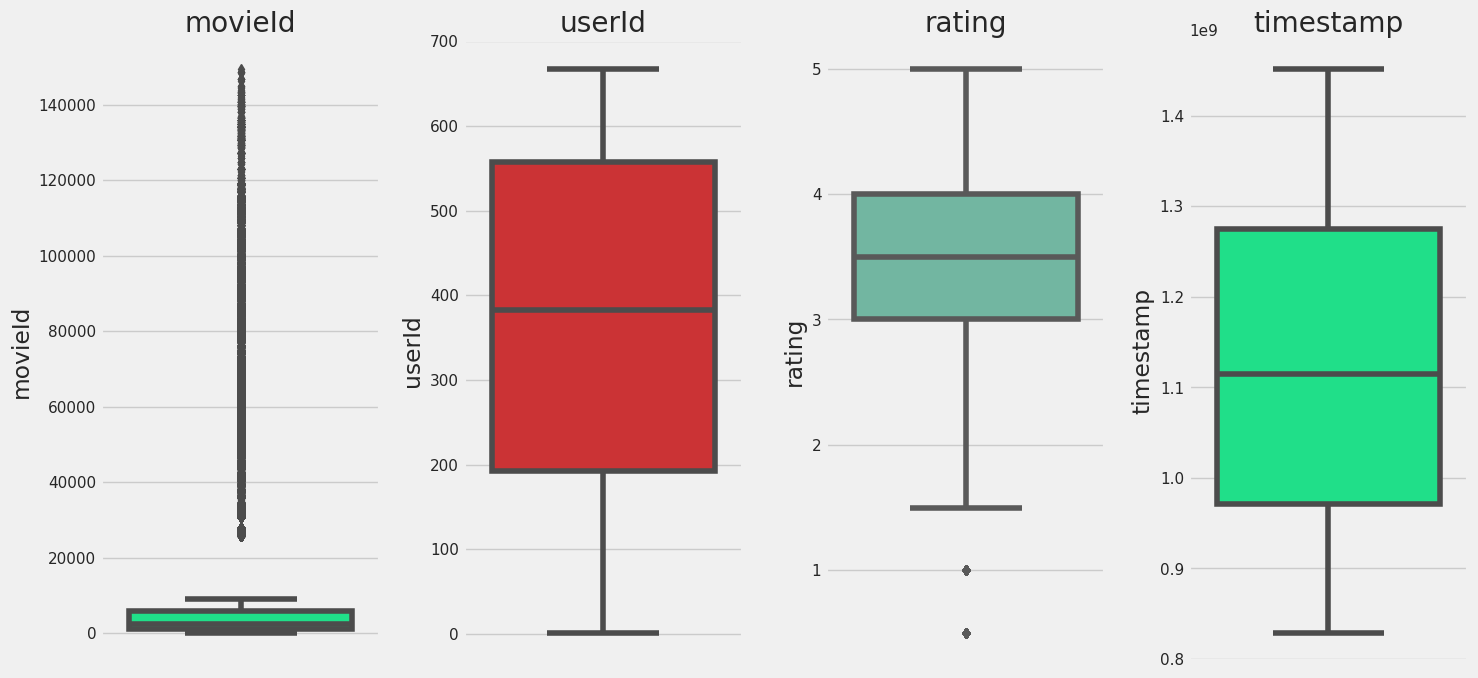

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,7))

# plotting
features = numericals
pallete=['gist_rainbow','Set1','Set2']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_user_ratings[features[i]], palette=pallete[i % len(pallete)])
    plt.title("{}".format(features[i]))
    plt.tight_layout()

Observation:

1. Ada outlier di kolom movieId
2. outlier masih dibilang wajar karena di data ini movieId lebih banyak daripada userId
<!-- 3. kita akan menghapus rating yang kurang dari 1. -->

##### Handling outliers

In [ ]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                 else 'not-outlier' for x in data[column].values]

In [ ]:
df_user_ratings['outlier_movieId'] = check_outlier(data=df_user_ratings, column='movieId')

<ipython-input-39-305ba9cde56f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_ratings['outlier_movieId'] = check_outlier(data=df_user_ratings, column='movieId')


In [ ]:
df_user_ratings.head()

,movieId,title,genres,userId,rating,timestamp,timestamp_seconds,outlier_movieId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08,1997-03-22 16:08:15,not-outlier
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09,2011-04-22 19:37:19,not-outlier
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08,1997-03-17 15:02:13,not-outlier
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08,1996-12-17 09:43:30,not-outlier
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08,1996-12-28 09:44:46,not-outlier


In [ ]:
df_user_ratings[df_user_ratings['outlier_movieId'] == 'outlier']

,movieId,title,genres,userId,rating,timestamp,timestamp_seconds,outlier_movieId
87110,25736,Dr. Jekyll and Mr. Hyde (1920),Drama|Horror|Sci-Fi,668.0,3.5,1.396225e+09,2014-03-31 00:12:56,outlier
87111,25746,"Hunchback of Notre Dame, The (1923)",Drama|Horror,668.0,3.0,1.373886e+09,2013-07-15 11:04:29,outlier
87112,25748,HE Who Gets Slapped (1924),Drama|Thriller,668.0,3.5,1.366144e+09,2013-04-16 20:26:29,outlier
87113,25750,Sherlock Jr. (1924),Comedy|Fantasy|Romance,255.0,3.0,1.174422e+09,2007-03-20 20:20:11,outlier
87114,25750,Sherlock Jr. (1924),Comedy|Fantasy|Romance,668.0,4.5,1.352873e+09,2012-11-14 06:03:08,outlier
...,...,...,...,...,...,...,...,...
105338,148238,A Very Murray Christmas (2015),Comedy,475.0,3.0,1.451213e+09,2015-12-27 10:44:03,outlier
105339,148626,The Big Short (2015),Drama,458.0,4.0,1.452015e+09,2016-01-05 17:25:49,outlier
105340,148626,The Big Short (2015),Drama,576.0,4.5,1.451688e+09,2016-01-01 22:34:24,outlier
105341,148626,The Big Short (2015),Drama,668.0,4.5,1.451148e+09,2015-12-26 16:42:28,outlier


In [ ]:
df_user_ratings['movieId'].count()

105339

In [ ]:
df_user_ratings = df_user_ratings[df_user_ratings['outlier_movieId'] =='not-outlier']

In [ ]:
df_user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87108 entries, 0 to 87109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movieId            87108 non-null  int64         
 1   title              87108 non-null  object        
 2   genres             87108 non-null  object        
 3   userId             87108 non-null  float64       
 4   rating             87108 non-null  float64       
 5   timestamp          87108 non-null  float64       
 6   timestamp_seconds  87108 non-null  datetime64[ns]
 7   outlier_movieId    87108 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
df_user_ratings.drop('outlier_movieId', axis=1, inplace=True)

<ipython-input-45-528271b603cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_ratings.drop('outlier_movieId', axis=1, inplace=True)


In [ ]:
df_user_ratings.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp',
       'timestamp_seconds'],
      dtype='object')

In [ ]:
# df_user_ratings[df_user_ratings['rating']<1]

In [ ]:
# df_user_ratings = df_user_ratings[df_user_ratings['rating'] >= 1]


In [ ]:
# df_user_ratings.info()

In [ ]:
# df_user_ratings[df_user_ratings['rating']<1]

In [ ]:
# df_user_ratings = df_user_ratings[df_user_ratings['rating'] >= 1]


In [ ]:
# df_user_ratings.info()

#### KDE plot for knowing the distribution form

<ipython-input-53-d163aa784631>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_user_ratings[feat_num[i]], color=colors[i % len(colors)])
<ipython-input-53-d163aa784631>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_user_ratings[feat_num[i]], color=colors[i % len(colors)])
<ipyth

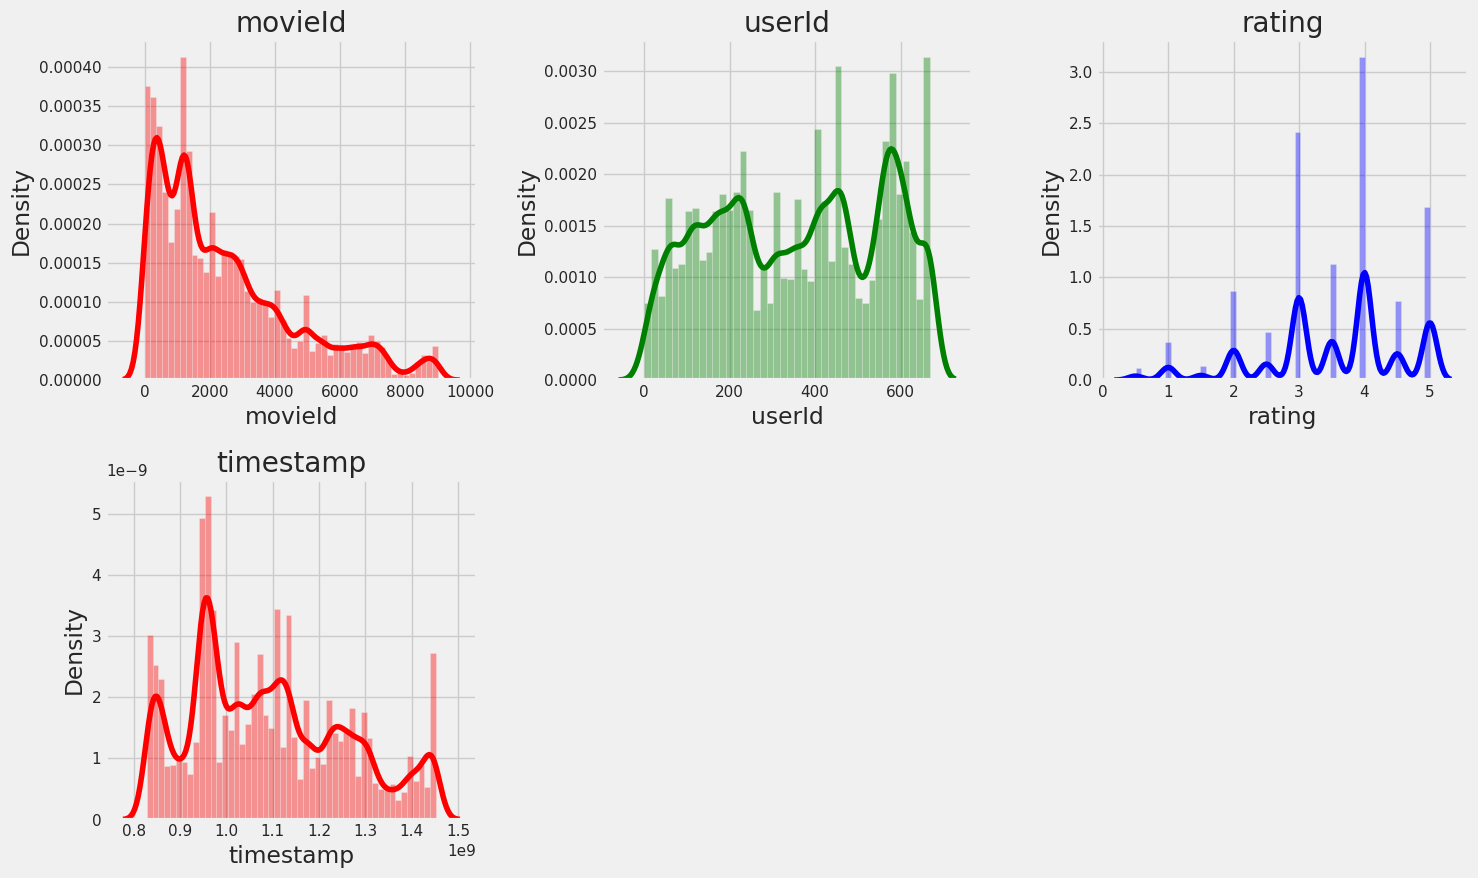

In [ ]:
import colorsys
# adjust the figure size for better readability

plt.figure(figsize=(15,9))

feat_num= numericals
colors=['red','green','blue']
for i in range(0, len(feat_num)):
    plt.subplot(2, len(feat_num)//2 +1, i+1)
    sns.distplot(x=df_user_ratings[feat_num[i]], color=colors[i % len(colors)])
    plt.xlabel(feat_num[i])
    plt.title("{}".format(feat_num[i]))
    plt.tight_layout()

Observation:

* Tidak ada yang mengindikasikan distribusi simetris
* Pada awalnya kita mengira kolom rating dan timestamp memiliki distribusi yang normal. Namun dilihat dari kde, ternyata dua kolom tersebut merupakan multimodal distribution

**Distribusi pada rating**

In [ ]:
# df_user_ratings['rating'].hist(figsize=(8,5),bins=9,range=(1, 5));
# plt.title('Movies Rating')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

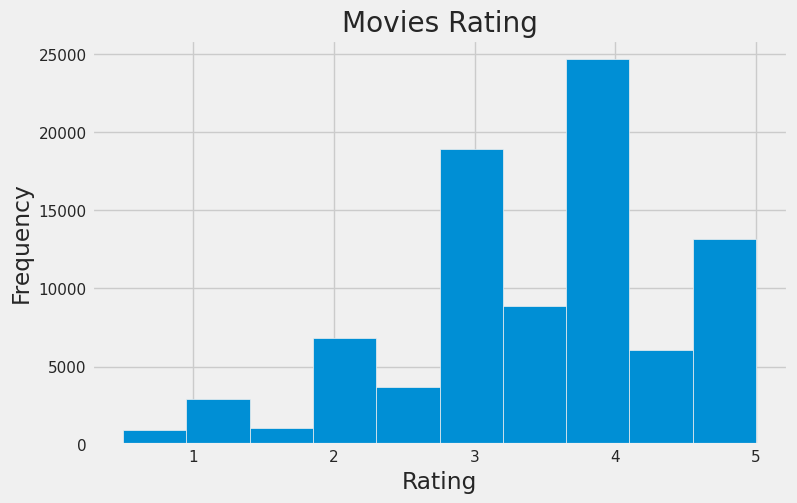

In [ ]:
df_user_ratings['rating'].hist(figsize=(8,5));
plt.title('Movies Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Observation:
* Frequency Rating paling tinggi pada distribusi adalah 4.0. Kemungkinan user banyak yang memberi rating 4.0 sebagai tanda umum bahwa movie yang ditonton standard dan tidak terlalu memuaskan.

In [ ]:
# # Menampilkan histogram dengan persentase
# plt.figure(figsize=(8, 5))
# sns.histplot(data=df_user_ratings['rating'], stat="percent", bins=10)
# plt.title('Movies Rating')
# plt.xlabel('Rating')
# plt.ylabel('Percentage')
# plt.show()

### Bivariate Analysis

#### Hubungan antara 'rating' dan 'genres'

In [ ]:
df_user_ratings.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp',
       'timestamp_seconds'],
      dtype='object')

In [ ]:
df_user_ratings['genres']

0        Adventure|Animation|Children|Comedy|Fantasy
1        Adventure|Animation|Children|Comedy|Fantasy
2        Adventure|Animation|Children|Comedy|Fantasy
3        Adventure|Animation|Children|Comedy|Fantasy
4        Adventure|Animation|Children|Comedy|Fantasy
                            ...                     
87105                  Drama|Fantasy|Mystery|Romance
87106                                      Drama|War
87107                                Documentary|War
87108                                Documentary|War
87109                                Documentary|War
Name: genres, Length: 87108, dtype: object

In [ ]:
df_user_ratings['genres'] = df_user_ratings['genres'].str.split('|') #memecah kolom 'genres' menjadi genre-genre individu

In [ ]:
df_user_ratings['genres']

0        [Adventure, Animation, Children, Comedy, Fantasy]
1        [Adventure, Animation, Children, Comedy, Fantasy]
2        [Adventure, Animation, Children, Comedy, Fantasy]
3        [Adventure, Animation, Children, Comedy, Fantasy]
4        [Adventure, Animation, Children, Comedy, Fantasy]
                               ...                        
87105                   [Drama, Fantasy, Mystery, Romance]
87106                                         [Drama, War]
87107                                   [Documentary, War]
87108                                   [Documentary, War]
87109                                   [Documentary, War]
Name: genres, Length: 87108, dtype: object

In [ ]:
df_expanded = df_user_ratings.explode('genres') #mengubah struktur DataFrame agar setiap genre memiliki baris sendiri menggunakan fungsi explode() pada kolom 'genres'.

In [ ]:
rating_by_genre = df_expanded.groupby('genres')['rating'].mean() #menghitung rata-rata rating untuk setiap genre menggunakan groupby() dan mean().

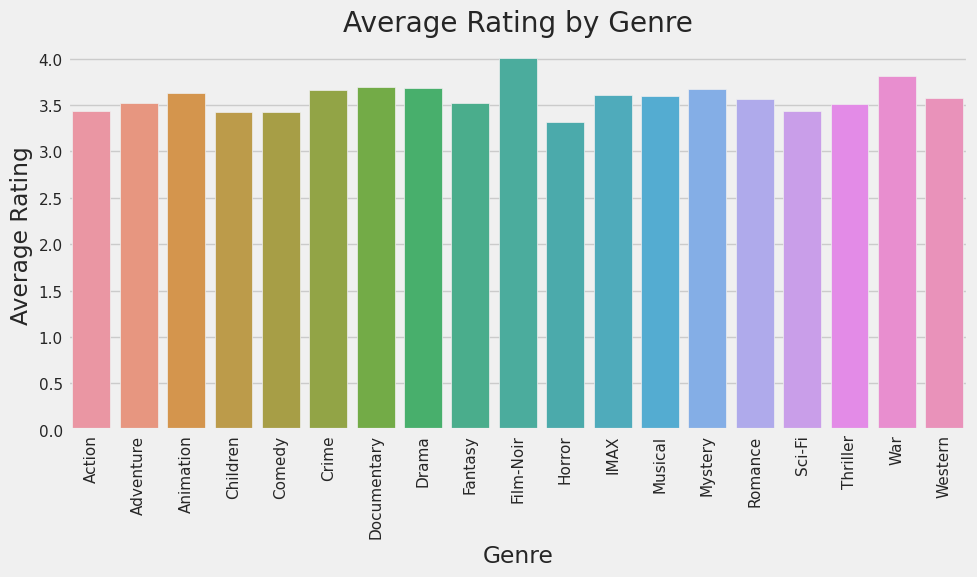

In [ ]:
#memvisualisasikan hubungan antara 'rating' dan 'genres' menggunakan plot bar.

# Mengatur plot bar
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_by_genre.index, y=rating_by_genre.values)

# Mengatur label dan judul
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')

# Memutar label genre sejajar dengan sumbu x
plt.xticks(rotation=90)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Hubungan userId dan Rating

In [ ]:
rating_by_user = df_user_ratings.groupby('userId')['rating'].mean() #menggunakan fungsi groupby() dan mean() untuk menghitung rata-rata rating, atau fungsi statistik lain seperti median() atau count().

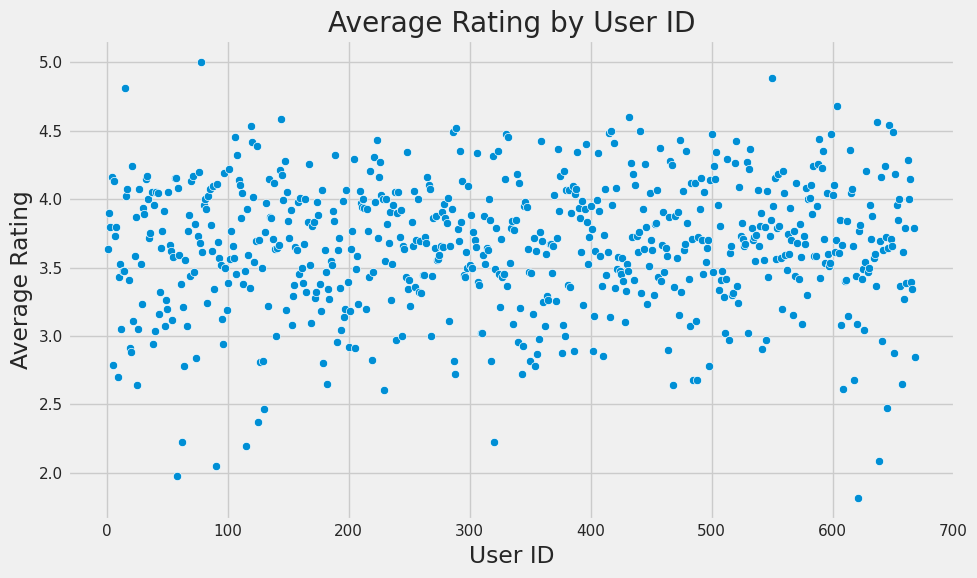

In [ ]:
# Mengatur plot scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rating_by_user.index, y=rating_by_user.values)

# Mengatur label dan judul
plt.xlabel('User ID')
plt.ylabel('Average Rating')
plt.title('Average Rating by User ID')

# Menampilkan plot
plt.tight_layout()
plt.show()

Observation:

menunjukkan bahwa tidak ada tren khusus atau pola linier yang dominan antara 'rating' dan 'userId'. Ini berarti adanya hubungan yang merata atau tidak terlalu terkonsentrasi antara 'rating' dan 'userId'

### Multivariate Analysis

#### Correlation Matrix

<ipython-input-51-afa6a39d6cdb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_= df_user_ratings.corr()


<Axes: >

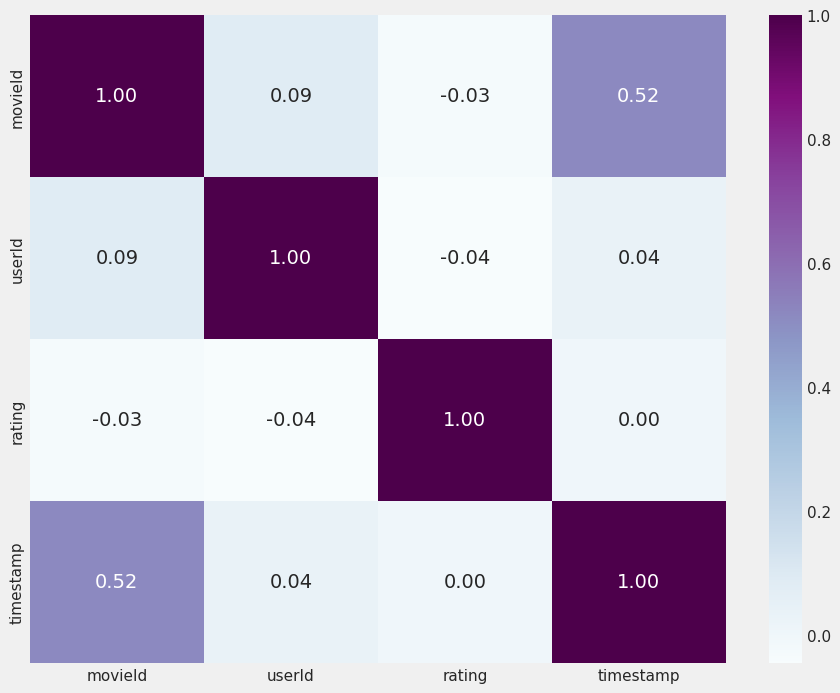

In [ ]:
corr_= df_user_ratings.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Observation :
1. tidak ada variabel yang berkorelasi tinggi satu sama lain
2. variabel timestamp berkolerasi sedang(moderate) yang searah terhadap movieId.

  -

### Deep dive Analysis

#### Apa saja top 3 movie yang paling banyak dinilai (rated) ?

In [ ]:
df_user_ratings.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp',
       'timestamp_seconds'],
      dtype='object')

In [ ]:
# Menghitung jumlah rating untuk setiap movieId
rating_counts = df_user_ratings.groupby('movieId')['rating'].count()

# Mengurutkan berdasarkan jumlah rating secara menurun
top_rated_movies = rating_counts.sort_values(ascending=False).head(3)

# Mendapatkan informasi film berdasarkan movieId
top_movies_info = df_movies[df_movies['movieId'].isin(top_rated_movies.index)]

# Menampilkan hasil top 3 film yang paling banyak dinilai
# top_movies_info[['movieId', 'title', 'genres']]
top_movies_info

,movieId,title,genres
260,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
279,318,"Shawshank Redemption, The (1994)",Crime|Drama
316,356,Forrest Gump (1994),Comedy|Drama|Romance|War


Observation:

3 Movie yang paling banyak dinilai (rated) semuanya sama-sama dirilis pada tahun 1994 dan memiliki unsur Comedy, Drama,atau Thriller pada genre

#### Berapa persentase film yang memiliki rating di bawah 3?

In [ ]:
num_low_ratings = len(df_user_ratings[df_user_ratings['rating'] < 3])
total_movies = len(df_user_ratings)
percentage_low_ratings = (num_low_ratings / total_movies) * 100
print("Persentase film yang memiliki rating di bawah 3:", percentage_low_ratings, "%")

Persentase film yang memiliki rating di bawah 3: 17.649354823896772 %


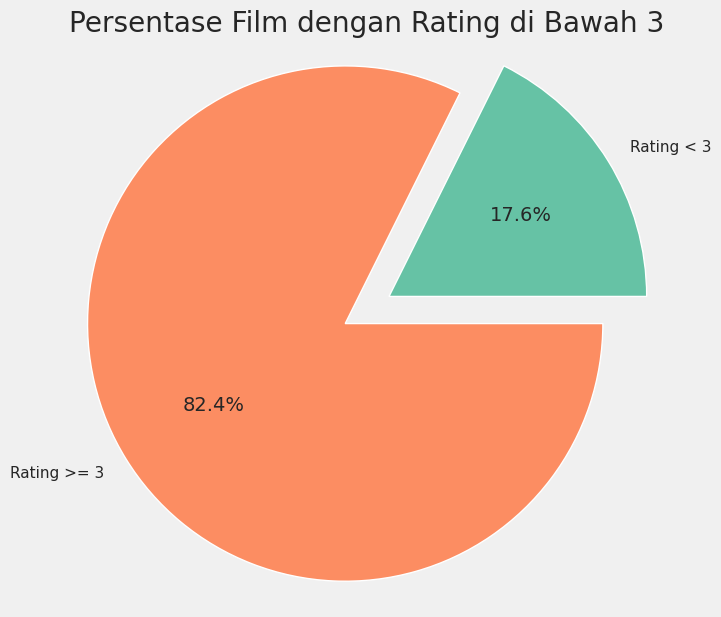

In [ ]:
# Menghitung jumlah film dengan rating di bawah 3
num_low_ratings = len(df_user_ratings[df_user_ratings['rating'] < 3])

# Menghitung jumlah film dengan rating di atas atau sama dengan 3
num_high_ratings = len(df_user_ratings[df_user_ratings['rating'] >= 3])

plt.figure(figsize=(7,7))
# Menyiapkan data untuk plot
labels = ['Rating < 3', 'Rating >= 3']
sizes = [num_low_ratings, num_high_ratings]
colors = sns.color_palette('Set2')

# Membuat plot pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',explode= [0, 0.2],wedgeprops = {'linewidth' : 1 , 'edgecolor' : 'white'})
plt.axis('equal')

# Menampilkan judul dan legend
plt.title('Persentase Film dengan Rating di Bawah 3')

# Menampilkan plot
plt.show()


#### Bagaimana distribusi jumlah rating oleh pengguna?

In [ ]:
rating_per_user = df_user_ratings.groupby('userId')['rating'].count()

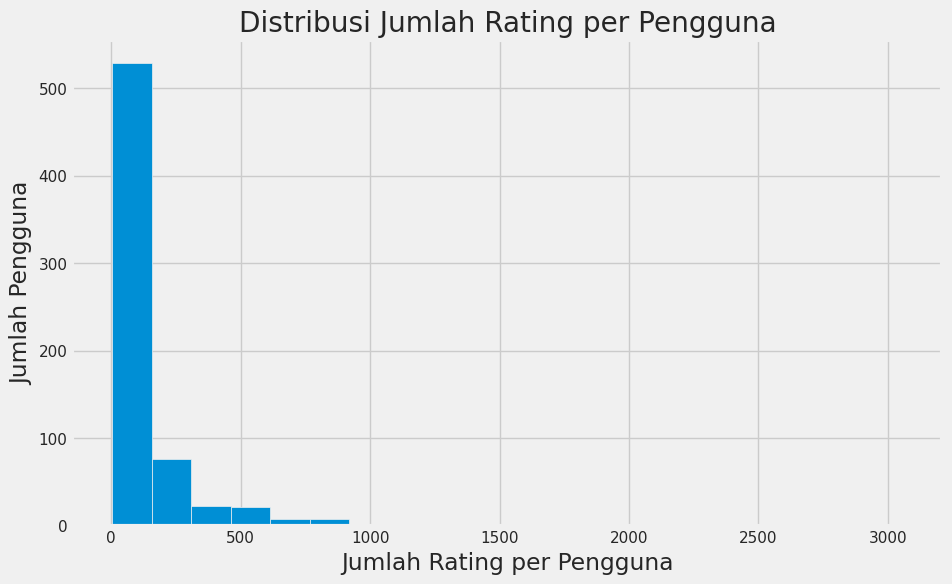

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(rating_per_user,bins=20)
plt.xlabel('Jumlah Rating per Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Jumlah Rating per Pengguna')
plt.show()

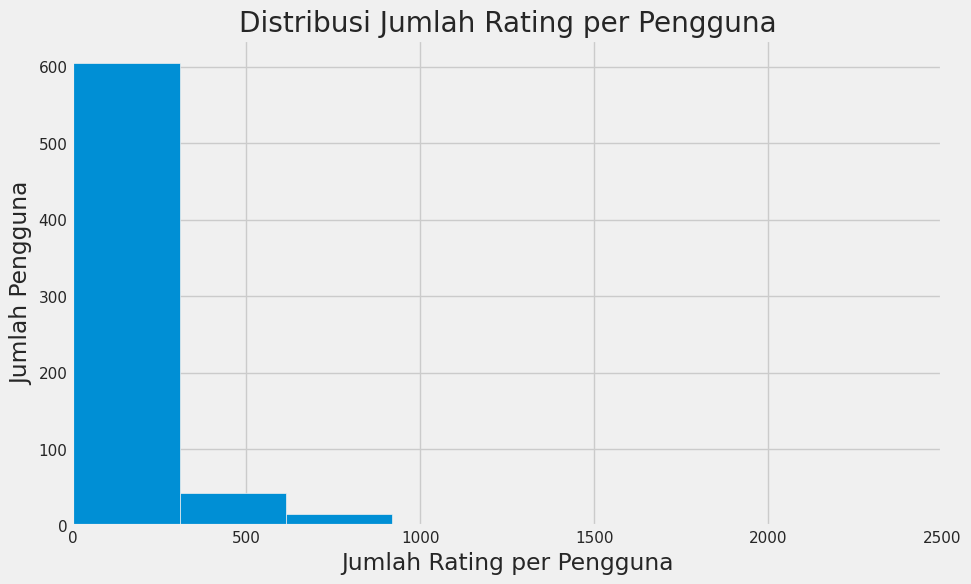

In [ ]:
plt.figure(figsize=(10, 6))
# Mengatur rentang sumbu x
plt.xlim(0, 2500)

plt.hist(rating_per_user)
plt.xlabel('Jumlah Rating per Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Jumlah Rating per Pengguna')
plt.show()

Observation:

Lebih dari 600 pengguna memberikan sebanyak kurang lebih 500 rating. Sedangkan kurang dari 50 pengguna memberikan sebanyak 1000 rating atau lebih

In [ ]:
# # Mengatur plot histogram
# plt.figure(figsize=(10, 6))
# plt.hist(df_user_ratings['userId'].value_counts(), bins=20)

# # Mengatur label dan judul
# plt.xlabel('Jumlah Rating')
# plt.ylabel('Jumlah Pengguna')
# plt.title('Distribusi Jumlah Rating oleh Pengguna')

# # Menampilkan plot
# plt.show()

#### Bagaimana distribusi jumlah rating per movie?

In [ ]:
user_rating_counts = df_user_ratings['userId'].value_counts()

In [ ]:
user_rating_counts

668.0    3058
575.0    2079
458.0    1637
607.0    1176
310.0    1066
         ... 
106.0      10
256.0      10
78.0        9
467.0       8
306.0       3
Name: userId, Length: 668, dtype: int64

In [ ]:
rating_per_item = df_user_ratings.groupby('movieId')['rating'].count()

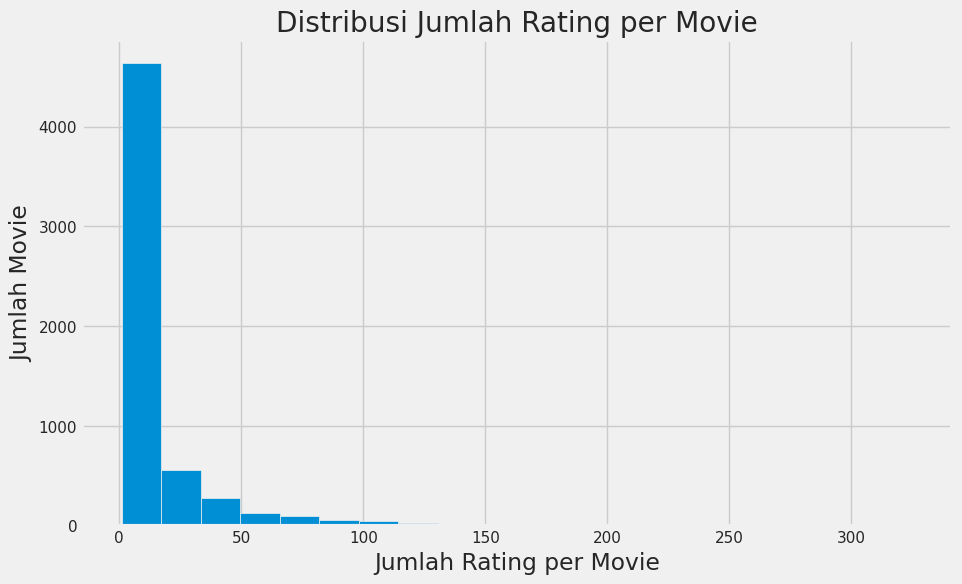

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(rating_per_item, bins=20)
plt.xlabel('Jumlah Rating per Movie')
plt.ylabel('Jumlah Movie')
plt.title('Distribusi Jumlah Rating per Movie')
plt.show()

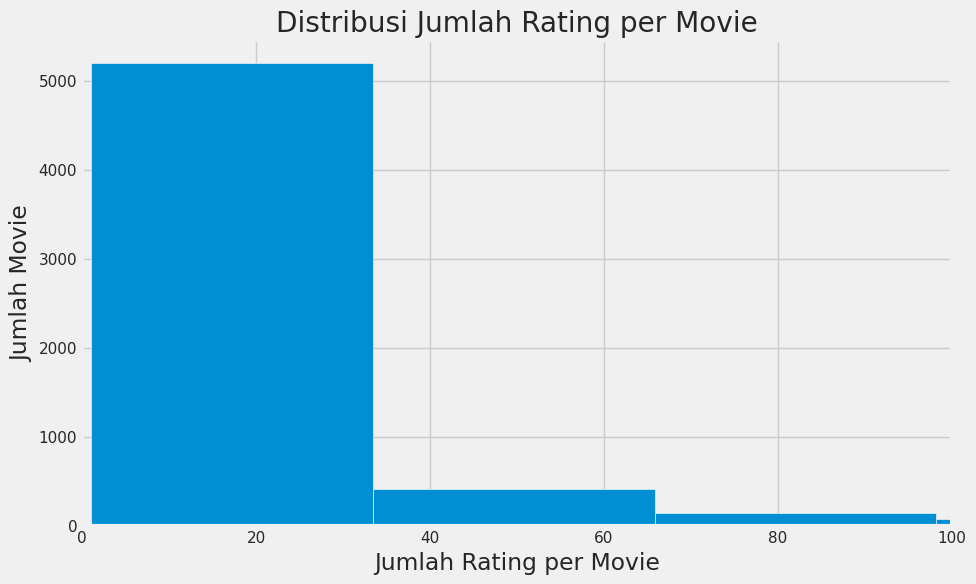

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlim(0,100)
plt.hist(rating_per_item)
plt.xlabel('Jumlah Rating per Movie')
plt.ylabel('Jumlah Movie')
plt.title('Distribusi Jumlah Rating per Movie')
plt.show()

Observation:

terdapat sekitar lebih 8000 movie yang telah menerima sekitar kurang dari 40 rating. Ini menarik karena movie dengan rating terbanyak ternyata mendapatkan rating tidak lebih dari 100

#### Berapa jumlah user yang hanya memberikan rating kurang dari 50 kali?

In [ ]:
user_rating_counts = df_user_ratings['userId'].value_counts().reset_index()

In [ ]:
user_rating_counts.columns = ["userId", "rating_count"]

In [ ]:
user_rating_counts

,userId,rating_count
0,668.0,3058
1,575.0,2079
2,458.0,1637
3,607.0,1176
4,310.0,1066
...,...,...
663,106.0,10
664,256.0,10
665,78.0,9
666,467.0,8


In [ ]:
unique_users = df_user_ratings['userId'].nunique()
print("Jumlah userId yang unik:", unique_users)

Jumlah userId yang unik: 668


In [ ]:
rating_50_count=user_rating_counts[user_rating_counts['rating_count']<50]

In [ ]:
rating_50_count

,userId,rating_count
381,96.0,49
382,305.0,49
383,167.0,49
384,190.0,49
385,5.0,49
...,...,...
663,106.0,10
664,256.0,10
665,78.0,9
666,467.0,8


In [ ]:
percentage = (242 / 668) * 100
print("Persentase: {:.2f}%".format(percentage))

Persentase: 36.23%


In [ ]:
# distribution = single_rating_users.value_counts()

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.histplot(data=distribution, bins=5)
# plt.xlabel('Jumlah Rating')
# plt.ylabel('Jumlah User')
# plt.title('Distribusi User dengan 1 Rating')
# plt.show()

#### Berapa jumlah movie yang hanya mendapatkan rating sebanyak 1 kali?

In [ ]:
rating_counts=df_user_ratings["title"].value_counts().reset_index()
rating_counts.columns = ["title", "rating_count"]

In [ ]:
rating_counts[rating_counts['rating_count']==1]

,title,rating_count
4562,"Grass Is Greener, The (1960)",1
4563,Going in Style (1979),1
4564,Jack and the Beanstalk (1952),1
4565,Drunks (1995),1
4566,"Eighth Day, The (Huitième jour, Le) (1996)",1
...,...,...
5905,"Beast from 20,000 Fathoms, The (1953)",1
5906,Scarlet Street (1945),1
5907,Ash Wednesday (2002),1
5908,"Cruise, The (1998)",1


### EDA Conclution

1. Terdapat distribusi yang mengindikasikan positive skew pada distribusi rating maupun distribusi user. Terdapa4 242 user yang memberikan rating kurang dari 50 dan  juga lebih dari 3600 movies yang hanya medapat 1 kali rating. Kita juga melihat distribusi pada rating dan user dimana pemberian rating tidak tersebar baik. Hal ini dapat menyebabkan sparse pada matrix saat membangun reommendation system.

2. Dilihat dari bentuk dataset, dataset tersebut tidak memiliki banyak atribut konten yang bisa menjadi landasan untuk dibangun content based filtering. Namun dataset secara jelas menunjukkan preferensi pengguna, misalnya peringkat atau rating yang diberikan pengguna pada item tertentu.

3. Dari pertimbangan diatas, hal inilah yang menjadi landasan bagi kita untuk membangun rekomendasi Collaborative Filtering.

In [ ]:
# # Menghitung jumlah rating untuk setiap movieId
# rating_counts = df_user_ratings.groupby('movieId')['rating'].count()

# # Mengurutkan berdasarkan jumlah rating secara menurun
# top_rated_movies = rating_counts.sort_values(ascending=False).head(3)

# # Mendapatkan informasi film berdasarkan movieId
# top_movies_info = df_user_ratings[df_user_ratings['movieId'].isin(top_rated_movies.index)]

# # # Menambahkan kolom 'timestamp_seconds' ke dalam DataFrame top_movies_info
# # top_movies_info = top_movies_info.merge(df_user_ratings[['movieId','timestamp_seconds']].drop_duplicates(),on='movieId', how='left')

# # Menampilkan hasil top 3 film yang paling banyak dinilai beserta kolom 'timestamp_seconds'
# top_movies_info

In [ ]:
# # Menghitung jumlah rating untuk setiap movieId
# rating_counts = df_user_ratings.groupby('movieId')['rating'].count()

# # Mengurutkan berdasarkan jumlah rating secara menurun
# top_rated_movies = rating_counts.sort_values(ascending=False).head(3)

# # Mendapatkan informasi film berdasarkan movieId
# top_movies_info = df_user_ratings[df_user_ratings['movieId'].isin(top_rated_movies.index)]

# # Menambahkan kolom 'timestamp_seconds' ke dalam DataFrame top_movies_info
# top_movies_info = top_movies_info.merge(df_user_ratings[['movieId', 'timestamp_seconds']].drop_duplicates(), on='movieId', how='left')

# # Menampilkan hasil top 3 film yang paling banyak dinilai beserta kolom 'timestamp_seconds'
# print(top_movies_info[['movieId', 'title', 'genres', 'timestamp_seconds']])

In [ ]:
# # Menghitung jumlah rating untuk setiap movieId
# rating_counts = df_user_ratings.groupby('movieId')['rating'].count()

# # Mengurutkan berdasarkan jumlah rating secara menurun
# top_rated_movies = rating_counts.sort_values(ascending=False).head(3)

# # Mendapatkan informasi film berdasarkan movieId
# top_movies_info = df_user_ratings[df_user_ratings['movieId'].isin(top_rated_movies.index)]

# # Menambahkan kolom 'timestamp' ke dalam DataFrame top_movies_info
# top_movies_info = top_movies_info.merge(df_user_ratings[['movieId', 'timestamp_seconds']], on='movieId', how='left')

# # Menampilkan hasil top 3 film yang paling banyak dinilai
# print(top_movies_info[['movieId', 'title', 'genres', 'timestamp_seconds']])


In [ ]:
# rating_counts = df_all.groupby(['title']).size().reset_index(name='rating_count')
# rating_counts = rating_counts.sort_values('rating_count', ascending=False)
# rating_counts.head(10)

In [ ]:
# # Mengatur plot bar
# plt.figure(figsize=(10, 6))
# sns.barplot(x=rating_by_user.index, y=rating_by_user.values)

# # Mengatur label dan judul
# plt.xlabel('User ID')
# plt.ylabel('Average Rating')
# plt.title('Average Rating by User ID')

# # Memutar label User ID sejajar dengan sumbu x
# plt.xticks(rotation=90)

# # Menampilkan plot
# plt.tight_layout()
# plt.show()

In [ ]:
# # Menghitung jumlah pengguna unik berdasarkan film
# user_counts = df_user_ratings.groupby('movieId')['userId'].nunique()

# # Mengatur plot bar
# plt.figure(figsize=(10, 6))
# sns.barplot(x=user_counts.index, y=user_counts.values)

# # Mengatur label dan judul
# plt.xlabel('Movie')
# plt.ylabel('Number of Users')
# plt.title('Distribution of Users by Movie')

# # Memutar label film sejajar dengan sumbu x
# plt.xticks(rotation=90)

# # Menampilkan plot
# plt.tight_layout()
# plt.show()

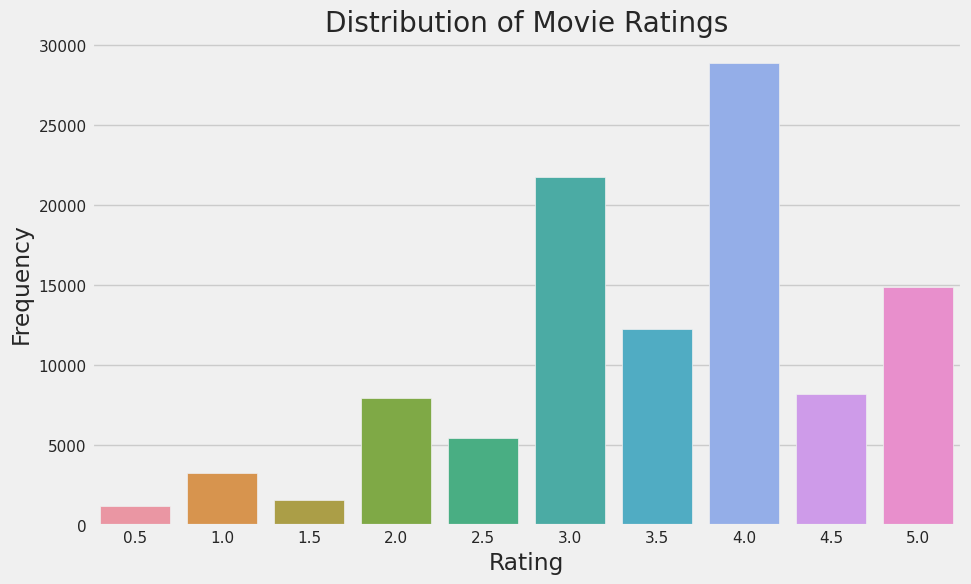

In [ ]:
# Menghitung jumlah rating film dalam setiap nilai rating
rating_counts = df_user_ratings['rating'].value_counts().sort_index()

# Mengatur plot bar
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)

# Mengatur label dan judul
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')

# Menampilkan plot
plt.show()

In [ ]:
# # Konversi timestamp menjadi format datetime
# df_user_ratings['timestamp_month'] = pd.to_datetime(df_user_ratings['timestamp'], unit='s')

# # Mengelompokkan data berdasarkan interval waktu bulanan
# df_rating_by_timestamp = df_user_ratings.groupby(pd.Grouper(key='timestamp_month', freq='M')).mean()

# # Mengatur plot bar
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df_rating_by_timestamp, x=df_rating_by_timestamp.index, y='rating')

# # Mengatur label dan judul
# plt.xlabel('Timestamp (Monthly)')
# plt.ylabel('Average Rating')
# plt.title('Average Rating by Timestamp (Monthly)')

# # Memutar label timestamp sejajar dengan sumbu x
# plt.xticks(rotation=90)

# # Menampilkan plot
# plt.tight_layout()
# plt.show()

In [ ]:
# # Mengambil kolom yang ingin ditampilkan pada sumbu x dan sumbu y
# x = df_user_ratings['genres']
# y = df_user_ratings['rating']

# # Mengatur plot scatter
# plt.figure(figsize=(8, 6))
# plt.scatter(x, y)

# # Mengatur label dan judul
# plt.xlabel('Budget')
# plt.ylabel('Revenue')
# plt.title('Scatter Plot: Hubungan antara Budget dan Revenue')

# # Menampilkan plot
# plt.show()


1. Data tidak mengandung masalah yang terlalu besar. Ada missing values di beberapa kolom. Kita telah menanganinya sebaik mungkin.
2. Secara keseluruhan, nilai minimum dan maksimum masuk akal(make sense) untuk setiap kolom.
3. Dari boxplot kita bisa melihat outlier di kolom numerical. Tapi itu masih masuk akal(make sense) sehingga masih memungkinkan (tidak perlu drop).
4. kita berhasil melakukan univariate,bivariate analysis, dan multivariate analysis

# Recommendation System

- Recommendation system adalah sebuah sistem yang mengacu pada memprediksi sejumlah item atau data untuk pengguna di masa mendatang, kemudian dijadikan rekomendasi item paling teratas. Salah satu alasan mengapa perlu digunakannya recommendation system karena pengguna memiliki banyak pilihan untuk digunakan karena prevalensi internet.

> Indented block

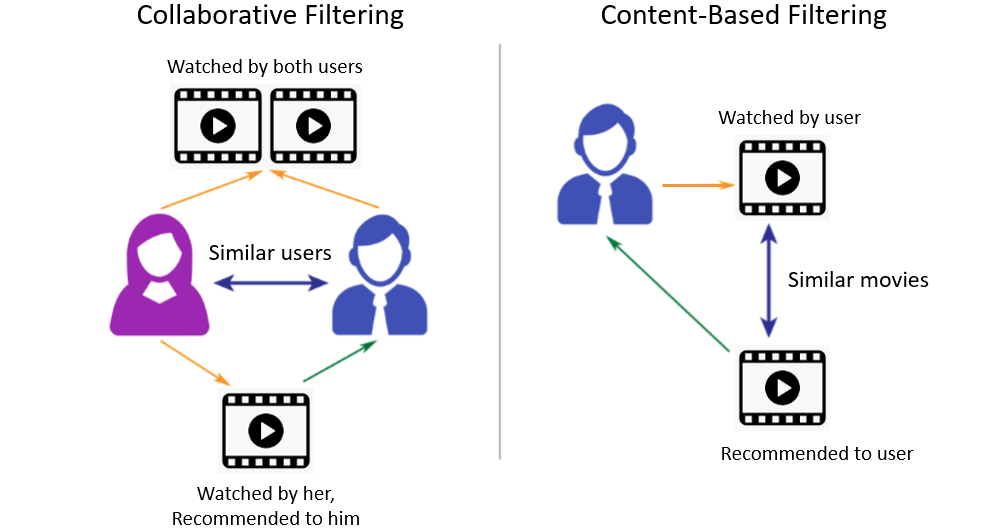


- Metode Pada Recommendation System
Recommendation System berbasis pemfilteran terbagi atas 3 metode :

  1. Content Based Recommendation
  2. Collaborative Filtering
  3. Content — Collaborative Recommendation (Hybrid Recommendation)


1. Content Based Recommendation
Content Based Recommendation memanfaatkan informasi beberapa item / data untuk direkomendasikan kepada pengguna sebagai referensi yang terkait dengan informasi yang digunakan sebelumnya. Tujuan dari content based recommendation agar dapat memprediksi persamaan dari sejumlah informasi yang didapat dari pengguna.

- Contoh, seorang pengguna sedang menonton video di Youtube. Konten yang dilihat oleh pengguna, yaitu tentang sepak bola. Youtube secara sistem akan merekomendasikan si pengguna untuk melihat video lain yang berhubungan dengan konten sepak bola.

- Dalam pembuatannya, content based filtering menggunakan konsep perhitungan vector, TF-IDF, dan Cosine Similarity yang intinya dikonversikan dari data / text menjadi berbentuk vektor.



2. Collaborative Filtering
Collaborative Filtering memanfaatkan transaksi suatu produk / item yang didasarkan kepada perilaku / kebiasaan si pengguna. Tujuannya agar pengguna yang sama dan item yang serupa dapat disukai oleh pengguna sebagai rekomendasi pilihan. Collaborative Filtering umumnya terbagi atas 2 metode :

* User-Based Collaborative Filtering (UB-CF)
* Item-Based Collaborative Filtering (IB-CF)

  - User-Based Collaborative Filtering (UB-CF) merekomendasikan item suatu produk dengan menemukan pengguna yang mirip dengan pengguna yang lainnya. Contoh, kita ingin merekomendasikan film kepada teman kita. Kita bisa berasumsi bahwa orang yang sama akan memiliki selera yang sama. Misalkan saya dan si B telah menonton film yang sama, dan kami menilai semuanya hampir identik. Tapi si B belum melihat film ‘Harry Potter : Bagian II’ dan saya tahu. Jika saya suka film itu, itu masuk akal untuk berpikir bahwa dia juga.

  - Item-Based Collaborative Filtering (IB-CF) merekomendasikan kesamaan antara item yang menargetkan / berinteraksi dengan pengguna dan item lainnya. Contoh, seorang pengguna menyukai tim sepak bola “Bayern Munich”. Sistem secara otomatis akan merekomendasikan suatu item yang berhubungan dengan “Bayern Munich”, seperti jersey, bola, poster, dan lain sebagainya yang berhubungan.

3. Content — Collaborative Recommendation System (Hybrid Recommendation System)
Hybrid Recommendation System adalah gabungan antara metode content based filtering dengan collaborative filtering.


## Colabborative using Surprise

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095477 sha256=031bb46dc8e60f3c7ebc41068e871a4824a02d850c56fef01e008773b124e977
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import accuracy
from surprise.model_selection.validation import cross_validate
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import KNNWithMeans
# reader = Reader()
# surprise_data = Dataset.load_from_df(df_all, reader)

In [ ]:
reader = Reader()
all_movies = df_user_ratings[['userId','movieId','rating']]
surprise_data = Dataset.load_from_df(all_movies, reader)

In [ ]:
#Split the data into training and test set in the ratio of 80:20 respectively
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(surprise_data, test_size=.2, random_state=42)

In [ ]:
from collections import defaultdict
#uid=user_id,iid=index_id
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
# from collections import defaultdict

# def get_top_n_for_item(predictions, n=10):
#     # First map the predictions to each item.
#     top_n = defaultdict(list)
#     for uid, iid, true_r, est, _ in predictions:
#         top_n[iid].append((uid, est))

#     # Then sort the predictions for each item and retrieve the k highest ones.
#     for iid, item_ratings in top_n.items():
#         item_ratings.sort(key=lambda x: x[1], reverse=True)
#         top_n[iid] = item_ratings[:n]

#     return top_n


In [ ]:
class collab_filtering_based_recommender_model():
    def __init__(self, model, trainset, testset, data):
        self.model = model
        self.trainset = trainset
        self.testset = testset
        self.data = data
        self.pred_test = None
        self.recommendations = None
        self.top_n = None
        self.recommenddf = None



    def fit_and_predict(self):
            print('<--Fitting the train data-->')
            self.model.fit(self.trainset)

            print('<--Predicting the test data-->')
            self.pred_test = self.model.test(self.testset)
            rmse_test = round(accuracy.rmse(self.pred_test), 3)
            print('RMSE for testing is ' + str(rmse_test) + '')

            self.pred_train = self.model.test(self.trainset.build_testset())
            rmse_train = round(accuracy.rmse(self.pred_train), 3)
            print('RMSE for training is ' + str(rmse_train) + '')

            self.top_n = get_top_n(self.pred_test)
            self.recommenddf = pd.DataFrame(columns=['userId', 'movieId', 'rating'])
            for item in self.top_n:
                subdf = pd.DataFrame(self.top_n[item], columns=['movieId', 'rating'])
                subdf['userId'] = item
                cols = subdf.columns.tolist()
                cols = cols[-1:] + cols[:-1]
                subdf = subdf[cols]
                self.recommenddf = pd.concat([self.recommenddf, subdf], axis=0)

            return rmse_test, rmse_train

    def cross_validate(self):
        print('<--Cross Validating the data-->')
        cv_result = cross_validate(self.model, self.data, n_jobs=-1)
        cv_result = round(cv_result['test_rmse'].mean(),3)
        print('<--Mean CV RMSE is ' + str(cv_result)  + '-->')
        return cv_result

    def recommend(self, userId, n=5):
        userId = int(userId)
        print('Top Recommended  movies for userid : ' + str(userId) + '')


        df = self.recommenddf[self.recommenddf['userId'] == userId].head(n)
        df = self.recommenddf[(self.recommenddf['userId'] == userId) & (self.recommenddf['rating'] > 3)]

        df = df.merge(df_movies[['movieId','title']], on='movieId', how='left')
        df = df[['userId', 'movieId', 'rating', 'title']]
        display(df)
        return df

In [ ]:
# class collab_filtering_based_recommender_model():
#     def __init__(self, model, trainset, testset, data):
#         self.model = model
#         self.trainset = trainset
#         self.testset = testset
#         self.data = data
#         self.pred_test = None
#         self.recommendations = None
#         self.top_n = None
#         self.recommenddf = None



#     def fit_and_predict(self):
#             print('<--Fitting the train data-->')
#             self.model.fit(self.trainset)

#             print('<--Predicting the test data-->')
#             self.pred_test = self.model.test(self.testset)
#             rmse_test = round(accuracy.rmse(self.pred_test), 3)
#             print('RMSE for testing is ' + str(rmse_test) + '')

#             self.pred_train = self.model.test(self.trainset.build_testset())
#             rmse_train = round(accuracy.rmse(self.pred_train), 3)
#             print('RMSE for training is ' + str(rmse_train) + '')

#             self.top_n_user = get_top_n(self.pred_test)
#             self.top_n_item = get_top_n_for_item(self.pred_test)
#             self.recommenddf = pd.DataFrame(columns=['userId', 'movieId', 'rating'])
#             for item in self.top_n_user:
#                 subdf = pd.DataFrame(self.top_n_user[item], columns=['movieId', 'rating'])
#                 subdf['userId'] = item
#                 cols = subdf.columns.tolist()
#                 cols = cols[-1:] + cols[:-1]
#                 subdf = subdf[cols]
#                 self.recommenddf = pd.concat([self.recommenddf, subdf], axis=0)

#             return rmse_test, rmse_train

#     def cross_validate(self):
#         print('<--Cross Validating the data-->')
#         cv_result = cross_validate(self.model, self.data, n_jobs=-1)
#         cv_result = round(cv_result['test_rmse'].mean(),3)
#         print('<--Mean CV RMSE is ' + str(cv_result)  + '-->')
#         return cv_result



#     def recommend_user_based(self, userId, n=5):
#         userId = int(userId)
#         print('Top Recommended movies (User-based) for userid : ' + str(userId) + '')

#         df = self.recommenddf[self.recommenddf['userId'] == userId].head(n)
#         df = self.recommenddf[(self.recommenddf['userId'] == userId) & (self.recommenddf['rating'] > 3)]

#         df = df.merge(df_user_ratings[['movieId','title']], on='movieId', how='left')
#         df = df[['userId', 'movieId', 'rating', 'title']]
#         display(df)
#         return df

#     def recommend_item_based(self, itemId, n=5):
#         movieId = int(movieId)
#         print('Top Recommended movies (Item-based) for itemid : ' + str(itemId) + '')

#         df = self.top_n_item[movieId][:n]
#         df = pd.DataFrame(df, columns=['userId', 'rating'])
#         df['movieId'] = movieId
#         df = df.merge(df_movies[['movieId','title']], on='movieId', how='left')
#         df = df[['movieId', 'rating', 'title']]
#         display(df)
#         return df

In [ ]:
# df = df.set_index('movieId')

In [ ]:
from surprise.model_selection import RandomizedSearchCV

def find_best_model(model, parameters,data):
    clf = RandomizedSearchCV(model, parameters, n_jobs=-1, measures=['rmse'])
    clf.fit(data)
    print(clf.best_score)
    print(clf.best_params)
    print(clf.best_estimator)
    return clf

### Memory Based

#### KNN With Means

In [ ]:
#Find optimal model using RandomizedSearchCV
sim_options = {
    "name": ["cosine", "pearson", "pearson_baseline"],
    "neighbors": [2,3,4,5,6,7,8],
    "user_based": [True],
}
params = { 'k': range(30,50,1), 'sim_options': sim_options}
clf = find_best_model(KNNWithMeans, params, surprise_data)

{'rmse': 0.8972881978783807}
{'rmse': {'k': 39, 'sim_options': {'name': 'cosine', 'neighbors': 5, 'user_based': True}}}
{'rmse': <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7f200a9547f0>}


In [ ]:
#Initialize
knnwithmeans = clf.best_estimator['rmse']
col_fil_knnwithmeans = collab_filtering_based_recommender_model(knnwithmeans, trainset, testset, surprise_data)

In [ ]:
#fit and predict
knnwithmeans_rmse = col_fil_knnwithmeans.fit_and_predict()

<--Fitting the train data-->
Computing the cosine similarity matrix...
Done computing similarity matrix.
<--Predicting the test data-->
RMSE: 0.9037
RMSE for testing is 0.904
RMSE: 0.7715
RMSE for training is 0.772


In [ ]:
#cross validate
knnwithmeans_cv_rmse = col_fil_knnwithmeans.cross_validate()

<--Cross Validating the data-->
<--Mean CV RMSE is 0.896-->


In [ ]:
result_knn_user1 = col_fil_knnwithmeans.recommend(userId=2.0, n=5)

Top Recommended  movies for userid : 2


,userId,movieId,rating,title
0,2.0,260,4.539783,Star Wars: Episode IV - A New Hope (1977)
1,2.0,802,4.022135,Phenomenon (1996)
2,2.0,1356,3.917622,Star Trek: First Contact (1996)
3,2.0,25,3.898911,Leaving Las Vegas (1995)
4,2.0,788,3.542711,"Nutty Professor, The (1996)"
5,2.0,784,3.321762,"Cable Guy, The (1996)"


In [ ]:
result_knn_user2 = col_fil_knnwithmeans.recommend(userId=5.0, n=5)

Top Recommended  movies for userid : 5


,userId,movieId,rating,title
0,5.0,2300,3.067552,"Producers, The (1968)"
1,5.0,4016,3.001400,"Emperor's New Groove, The (2000)"


In [ ]:
result_knn_user3 = col_fil_knnwithmeans.recommend(userId=8.0, n=5)

Top Recommended  movies for userid : 8


,userId,movieId,rating,title
0,8.0,805,4.093736,"Time to Kill, A (1996)"
1,8.0,1,4.052256,Toy Story (1995)
2,8.0,1042,3.959084,That Thing You Do! (1996)
3,8.0,802,3.791892,Phenomenon (1996)
4,8.0,104,3.732794,Happy Gilmore (1996)
5,8.0,376,3.711656,"River Wild, The (1994)"
6,8.0,804,3.587023,She's the One (1996)
7,8.0,832,3.543935,Ransom (1996)
8,8.0,783,3.497801,"Hunchback of Notre Dame, The (1996)"
9,8.0,5,3.493516,Father of the Bride Part II (1995)


#### KNN Basic

In [ ]:
#Find optimal model using RandomizedSearchCV
sim_options = {
    "name": ["cosine", "pearson", "pearson_baseline"],
    "neighbors": [2,3,4,5,6,7,8],
    "user_based": [True],
}
params = { 'k': range(30,50,1), 'sim_options': sim_options}
clf = find_best_model(KNNBasic, params, surprise_data)

{'rmse': 0.9774865487806809}
{'rmse': {'k': 38, 'sim_options': {'name': 'pearson_baseline', 'neighbors': 6, 'user_based': True}}}
{'rmse': <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f200a92e7a0>}


In [ ]:
#Initialize
knnBasic = clf.best_estimator['rmse']
col_fil_knnBasic = collab_filtering_based_recommender_model(knnBasic, trainset, testset, surprise_data)

In [ ]:
#fit and predict
knnBasic_rmse = col_fil_knnBasic.fit_and_predict()

<--Fitting the train data-->
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
<--Predicting the test data-->
RMSE: 0.9908
RMSE for testing is 0.991
RMSE: 0.3310
RMSE for training is 0.331


In [ ]:
#cross validate
knnBsic_cv_rmse = col_fil_knnBasic.cross_validate()

<--Cross Validating the data-->
<--Mean CV RMSE is 0.976-->


In [ ]:
result_knn_user1 = col_fil_knnBasic.recommend(userId=2.0, n=5)

Top Recommended  movies for userid : 2


,userId,movieId,rating,title
0,2.0,260,4.149048,Star Wars: Episode IV - A New Hope (1977)
1,2.0,802,3.653724,Phenomenon (1996)
2,2.0,25,3.432873,Leaving Las Vegas (1995)
3,2.0,1356,3.306578,Star Trek: First Contact (1996)
4,2.0,788,3.078692,"Nutty Professor, The (1996)"


In [ ]:
result_knn_user2 = col_fil_knnBasic.recommend(userId=5.0, n=5)

Top Recommended  movies for userid : 5


,userId,movieId,rating,title
0,5.0,2300,4.012980,"Producers, The (1968)"
1,5.0,595,3.749686,Beauty and the Beast (1991)
2,5.0,319,3.667400,Shallow Grave (1994)
3,5.0,2657,3.613093,"Rocky Horror Picture Show, The (1975)"
4,5.0,500,3.451833,Mrs. Doubtfire (1993)
5,5.0,592,3.451158,Batman (1989)
6,5.0,4016,3.002471,"Emperor's New Groove, The (2000)"


In [ ]:
result_knn_user3 = col_fil_knnBasic.recommend(userId=8.0, n=5)

Top Recommended  movies for userid : 8


,userId,movieId,rating,title
0,8.0,805,3.959573,"Time to Kill, A (1996)"
1,8.0,1,3.813403,Toy Story (1995)
2,8.0,104,3.639122,Happy Gilmore (1996)
3,8.0,802,3.514632,Phenomenon (1996)
4,8.0,804,3.439790,She's the One (1996)
5,8.0,832,3.413422,Ransom (1996)
6,8.0,5,3.405822,Father of the Bride Part II (1995)
7,8.0,376,3.183752,"River Wild, The (1994)"
8,8.0,785,3.115306,Kingpin (1996)
9,8.0,783,3.097326,"Hunchback of Notre Dame, The (1996)"


### Model Based

### SVD

In [ ]:
#Find optimal model using RandomizedSearchCV
params= {
    "n_epochs": [5, 10, 15, 20],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
clf = find_best_model(SVD, params, surprise_data)

{'rmse': 0.8834543113793162}
{'rmse': {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}}
{'rmse': <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f200b477a30>}


In [ ]:
#INITIALIZE
svd = clf.best_estimator['rmse']
col_fil_svd = collab_filtering_based_recommender_model(svd, trainset, testset, surprise_data)

In [ ]:
# fit and predict
svd_rmse = col_fil_svd.fit_and_predict()

<--Fitting the train data-->
<--Predicting the test data-->
RMSE: 0.8877
RMSE for testing is 0.888
RMSE: 0.8439
RMSE for training is 0.844


In [ ]:
#cross validate
svd_cv_rmse = col_fil_svd.cross_validate()

<--Cross Validating the data-->
<--Mean CV RMSE is 0.883-->


In [ ]:
result_svd_user1 = col_fil_svd.recommend(userId=2.0, n=5)

Top Recommended  movies for userid : 2


,userId,movieId,rating,title
0,2.0,260,4.256568,Star Wars: Episode IV - A New Hope (1977)
1,2.0,25,3.945189,Leaving Las Vegas (1995)
2,2.0,1356,3.830600,Star Trek: First Contact (1996)
3,2.0,802,3.806328,Phenomenon (1996)
4,2.0,788,3.500333,"Nutty Professor, The (1996)"
5,2.0,784,3.339938,"Cable Guy, The (1996)"


In [ ]:
result_svd_user2 = col_fil_svd.recommend(userId=5.0, n=5)

Top Recommended  movies for userid : 5


,userId,movieId,rating,title
0,5.0,2300,3.287238,"Producers, The (1968)"
1,5.0,4016,3.181987,"Emperor's New Groove, The (2000)"
2,5.0,1012,3.144837,Old Yeller (1957)
3,5.0,595,3.141977,Beauty and the Beast (1991)
4,5.0,319,3.139011,Shallow Grave (1994)
5,5.0,500,3.003078,Mrs. Doubtfire (1993)


In [ ]:
result_svd_user3 = col_fil_svd.recommend(userId=8.0, n=5)

Top Recommended  movies for userid : 8


,userId,movieId,rating,title
0,8.0,1,4.035934,Toy Story (1995)
1,8.0,805,3.960657,"Time to Kill, A (1996)"
2,8.0,802,3.769660,Phenomenon (1996)
3,8.0,1042,3.751402,That Thing You Do! (1996)
4,8.0,104,3.748976,Happy Gilmore (1996)
5,8.0,804,3.708903,She's the One (1996)
6,8.0,832,3.691528,Ransom (1996)
7,8.0,731,3.583504,Heaven's Prisoners (1996)
8,8.0,376,3.580479,"River Wild, The (1994)"
9,8.0,5,3.573105,Father of the Bride Part II (1995)


## Action Recommendation

- Kita telah berhasil membangun recommendation sistem dengan Collaborative Filterring. Namun ada beberapa peningkatan yang bisa kita lakukan kedepannya diantaranya :

1. Menambah evaluasi metric selain rmse, misalnya MAE dan MAPE

2. Membuat Hybrid Recommendation System yang menggabungkan antara content based filtering dan collaborative filtering

3. Buat sistem rekomendasi menggunakan Machine Learning yang mampu memperbarui rekomendasi berdasarkan interaksi pengguna terbaru dan memberikan rekomendasi yang lebih relevan seiring berjalannya waktu.

4. Mempertimbangkan untuk menggunakan teknologi AI terkini seperti deep learning dan jaringan saraf tiruan (neural networks) untuk meningkatkan performa sistem rekomendasi
